# Multiclass Text Classification - DL and Embedding layer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import re
import os
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

os.chdir('C:\\Users\\barry\\OneDrive - CSTBGroup\\image_ds\\images')


X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

X = X
y = y

df = X.merge(y, right_index = True, left_index = True)

df.drop(["productid", "imageid"], axis = 1, inplace = True)
df.head()

C:\Users\barry\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\barry\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\barry\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


,designation,description,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2705


In [2]:
df['description'] = df['description'].str.replace(r'\d+', '')
df['designation'] = df['designation'].str.replace(r'\d+', '')


df['description']=df['description'].astype(str)

In [3]:
df['designation2'] = df.designation +  " " + df.description 
df.designation = df['designation2']

In [4]:
print("Nombre de mots - variable designation : " , df['designation'].apply(lambda x: len(x.split(' '))).sum())
print("Nombre de mots - variable description : " , df['description'].apply(lambda x: len(x.split(' '))).sum())

Nombre de mots - variable designation :  7877182
Nombre de mots - variable description :  6887832


# Text Pre-processing

To get an idea of what needs to be deleted :

In [5]:
def print_plot(index):
    example = df[df.index == index][['designation', 'prdtypecode']].values[0]
    example2 = df[df.index == index][['description', 'prdtypecode']].values[0]
    try : 
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            print('DESCRIPTION : ', example2[0])
    except :
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            
def print_plotbis(index):
    example = dfbis[dfbis.index == index][['designation', 'prdtypecode']].values[0]
    example2 = dfbis[dfbis.index == index][['description', 'prdtypecode']].values[0]
    try : 
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])
            print('DESCRIPTION : ', example2[0])
    except :
        if len(example) > 0:
            print('prdtypecode:', example[1])
            print(example[0])            

Text cleaning :

In [6]:
df['description'] = df['description'].str.replace('\d+', '')
df['designation'] = df['designation'].str.replace(r'\d+', '')

dfbis = df.copy()
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^\w +-_]')

STOPWORDS = set(stopwords.words('english'))
STOPWORDS2 = set(stopwords.words('french'))
STOPWORDS3 = set(stopwords.words('german'))
Mail = re.compile(r'\S*@\S*\s?')

letter = re.compile(r'\s+\w{1,2}\s+')
letter2 = re.compile(r'^(\w){1}\s+')
letter3 = re.compile(r'^(\w){2}\s+')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = Mail.sub(' ', text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS2) # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS3) # remove stopwors from text
    text = letter.sub('', text)
    text = letter2.sub('', text)
    text = letter3.sub('', text)
    return text
df['designation'] = df['designation'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

print("Nombre de mots - variable designation : " , df['designation'].apply(lambda x: len(x.split(' '))).sum())
print("Nombre de mots - variable description : " , df['description'].apply(lambda x: len(x.split(' '))).sum())

Nombre de mots - variable designation :  4997684
Nombre de mots - variable description :  4318930


In [7]:
for i in np.random.random_integers(0,df.shape[0], 4) :
    print(print_plotbis(i))
    print()
    print(print_plot(i))
    print()
    print()

prdtypecode: 2705
Les Dossiers De L'agence  : Ceux D'en Bas Pas facile de transformer le théâtre d'un génocide en parc de loisirs ! C'est pourtant le défi que va devoir relever Mickie Katz pour l'Agence  dans un village perdu du Montana au milieu d'une nature sauvage hantée par l'esprit-totem d'un grizzly en colère et les fantômes d'Indiens assassinés en des temps anciens. Folklore et légendes fantaisistes cachent néanmoins des secrets bien réels et Mickie va peu à peu découvrir une population tenaillée par une culpabilité que rien n'apaise et prête à tout pour expier ses fautes. Qui est cet archer invisible qui caché dans la forêt prend pour cible les villageois avec la complicité des autorités locales ? Craignant de figurer bientôt au tableau de chasse du tireur fou Mickie va plonger au coeur du mystère jusqu'au fond de ce lac de montagne où jadis tout a commencé...
DESCRIPTION :  Pas facile de transformer le théâtre d'un génocide en parc de loisirs ! C'est pourtant le défi que va de

<ipython-input-7-95278cadca03>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 84916 + 1) instead
  for i in np.random.random_integers(0,df.shape[0], 4) :


## DATA TRANSFORMATION

In [36]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100


tokenizer = text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df["designation"].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 182078 unique tokens.


{'br': 1,
 'li': 2,
 'p': 3,
 'strong': 4,
 'nan': 5,
 'couleur': 6,
 'taille': 7,
 'cm': 8,
 'piscine': 9,
 'plus': 10,
 'peut': 11,
 'b': 12,
 'haute': 13,
 'eau': 14,
 'qualité': 15,
 'être': 16,
 'ul': 17,
 'dimensions': 18,
 'facile': 19,
 'matériel': 20,
 'tout': 21,
 'x': 22,
 'enfants': 23,
 'produit': 24,
 'sans': 25,
 'caractéristiques': 26,
 'bois': 27,
 'jeu': 28,
 'acier': 29,
 'm': 30,
 'plaît': 31,
 'comme': 32,
 'non': 33,
 'type': 34,
 'coussin': 35,
 'lumière': 36,
 'comprend': 37,
 'style': 38,
 'cette': 39,
 'oreiller': 40,
 'très': 41,
 'décoration': 42,
 'poids': 43,
 'led': 44,
 'taie': 45,
 'inclus': 46,
 'batterie': 47,
 'bébé': 48,
 'blanc': 49,
 'ans': 50,
 'main': 51,
 'protection': 52,
 'temps': 53,
 'sac': 54,
 'div': 55,
 'mode': 56,
 'raison': 57,
 'design': 58,
 'description': 59,
 'utiliser': 60,
 'hauteur': 61,
 'mesure': 62,
 'anti': 63,
 'maison': 64,
 'sol': 65,
 'contenu': 66,
 'neuf': 67,
 'amp': 68,
 'paquet': 69,
 'marque': 70,
 'pcs': 71,
 'po

In [37]:
X = tokenizer.texts_to_sequences(df["designation" ].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (84916, 250)


In [38]:
Y = pd.get_dummies(df['prdtypecode']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (84916, 27)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X,df.prdtypecode, test_size = 0.20, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(67932, 250) (67932, 27)
(16984, 250) (16984, 27)


## MODELISATION

In [40]:
from tensorflow.keras import callbacks
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            factor=0.6,
                                            patience=2,
                                            verbose=1,
                                            mode='max',
                                            min_lr=1e-7)
early_stop = callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=3,
                                         verbose=1,
                                         mode='max',
                                     min_delta=0.0001)
    
checkpoint = callbacks.ModelCheckpoint('textdl_26juin.h5',
                                           monitor='val_accuracy',
                                           verbose=1,
                                           save_weights_only=False,
                                           save_best_only=True,
                                           mode='max',
                                           save_freq='epoch')


In [41]:
glove_dir = "C:/Users/barry/Downloads/glove.6B.100d.txt"

In [53]:
import os
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = "float32")
    embeddings_index[word] = coefs
f.close()

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [69]:
MAX_NB_WORDS

10000

In [70]:
embedding_matrix = np.zeros((MAX_NB_WORDS , EMBEDDING_DIM))

for word, i in word_index.items():
    if i  < MAX_NB_WORDS  :
        embedding_vector = embeddings_index.get(word)
    if i  < MAX_NB_WORDS and embedding_vector is not None :   
        embedding_matrix[i] = embedding_vector

In [71]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,SpatialDropout1D, Embedding, Dense, GlobalAveragePooling1D, RNN, GRUCell, Dropout


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))


In [72]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [73]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, 
                              batch_size=batch_size,
                              validation_split=0.2,
                               class_weight = d_class_weights,
                              callbacks =  [lr_reduce, early_stop, checkpoint])
                            

Epoch 1/5
850/850 [==============================] - 703s 820ms/step - loss: 2.5973 - accuracy: 0.2257 - val_loss: 1.9343 - val_accuracy: 0.4219

Epoch 00001: val_accuracy improved from 0.03658 to 0.42195, saving model to textdl_26juin.h5
Epoch 2/5
850/850 [==============================] - 907s 1s/step - loss: 1.8379 - accuracy: 0.4397 - val_loss: 1.5731 - val_accuracy: 0.5293

Epoch 00002: val_accuracy improved from 0.42195 to 0.52926, saving model to textdl_26juin.h5
Epoch 3/5
850/850 [==============================] - 1326s 2s/step - loss: 1.5856 - accuracy: 0.5156 - val_loss: 1.3922 - val_accuracy: 0.5830

Epoch 00003: val_accuracy improved from 0.52926 to 0.58298, saving model to textdl_26juin.h5
Epoch 4/5
850/850 [==============================] - 1344s 2s/step - loss: 1.4055 - accuracy: 0.5624 - val_loss: 1.2817 - val_accuracy: 0.6139

Epoch 00004: val_accuracy improved from 0.58298 to 0.61390, saving model to textdl_26juin.h5
Epoch 5/5
850/850 [==============================] 

In [ ]:
model.save("pre_trained_glove_model.h5")

## EVALUATION

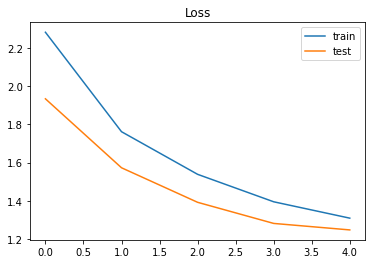

In [75]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

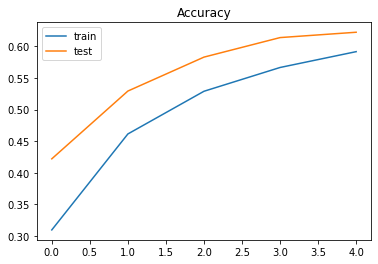

In [76]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [77]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(Y_test.argmax(axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.31      0.55      0.39       612
           1       0.57      0.45      0.50       521
           2       0.69      0.62      0.65       357
           3       0.88      0.83      0.85       161
           4       0.57      0.70      0.63       539
           5       0.77      0.73      0.75       786
           6       0.21      0.69      0.32       146
           7       0.64      0.33      0.44       961
           8       0.43      0.53      0.47       424
           9       0.76      0.74      0.75       974
          10       0.58      0.79      0.67       169
          11       0.52      0.56      0.54       507
          12       0.53      0.40      0.45       672
          13       0.62      0.49      0.55      1013
          14       0.89      0.73      0.80       841
          15       0.28      0.90      0.43       137
          16       0.67      0.58      0.62      1029
          17       0.37    